# Optimal-observable analysis of $e^+e^-\to t\bar{t}\to bW^+ \bar{b}W^-$

We provide here some numerical results conserning the optimal observable analysis of the resonant top-quark production at lepton colliders.

The statistically optimal observables are defined from an analytical leading-order computation of the standard-model and effective-field-theory differential cross section for the resonant $e^+e^-\to t\bar{t}\to bW^+ \bar{b}W^-$ production, in the massless $b$ quark limit.

In particular, the statistically optimal observable definition does not take into account beam structure, extra radiation (the top and anti-top are assumed back to back), finite detector resolutions, off-shell top-quark effects, etc.

This does not stop one from making accurate prediction for these observables with a manageably simple definition. Off-shell and radiative QCD correction are discussed in the paper. Finite efficiencies are chosen so as to reproduce full-simulation statistical uncertainties.

## Computation from a LHE file

Computing optimal observables from a LHE file is possible with the `optimal_observables_ee2tt2bwbw_from_lhe.cpp` code enclosed. Change `sqs`, `polp` and `pole` to the centre-of-mass energy, positron beam polarization and electron beam polarization; `lhe_name` to the path of the LHE file, `root_name` to the name of the rootfile in which kinematic variables are to be stored.


## Computation from analytical expression alone

In the rest of this notebook, we detail the computation and provide some sample results for the computation of the covariance matrices:
$${\rm cov}(C_i,C_j)^{-1} =
\epsilon\mathcal{L}\int {\rm d}\Phi
\left(
\frac{{\rm d}\sigma_i}{{\rm d}\Phi}
\frac{{\rm d}\sigma_j}{{\rm d}\Phi}
\Big/
\frac{{\rm d}\sigma_0}{{\rm d}\Phi}
\right)$$
at the $C_i=0,\forall i$ point (i.e. the SM point), given a distribution
$$\frac{{\rm d}\sigma}{{\rm d}\Phi} = \frac{{\rm d}\sigma_0}{{\rm d}\Phi} + C_i \frac{{\rm d}\sigma_i}{{\rm d}\Phi}$$
over the phase space $\Phi$. Factors of $\mathcal{L}$ and $\epsilon$ account for the integrated luminosity and efficiency of the run considered (specified by a centre-of-mass energy and beam polarizations).

Note the covariance on the operator coefficients is the inverse of the covariance on the optimal observables.

In [1]:
# loading some useful packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# defining helper functions and variables

# EFT operator names
op_names = ['ClqA', 'CeqA', 'CpqA', 'ClqV', 'CeqV', 'CpqV', 'CuZR', 'CuAR', 'CuZI', 'CuAI']

# print vector and matrices
def tprint(t,fmt='{:<9.2g}'):
    if hasattr(t[0], '__iter__'):
        for l in t:
            print (fmt*len(l)).format(*list(l))
    else:
        print (fmt*len(t)).format(*list(t))

## Phase-space integration
The $\frac{{\rm d}\sigma_0}{{\rm d}\Phi}$ and $\frac{{\rm d}\sigma_i}{{\rm d}\Phi}$ phase-space distribution for the resonant $e^+e^-\to t\bar{t}\to bW^+ \bar{b}W^-$ process and $C_i\in \{ C_{lq}^A, C_{eq}^A, C_{\varphi q}^A, C_{lq}^V, C_{eq}^V, C_{\varphi q}^V, C_{uZ}^R, C_{uA}^R, C_{uZ}^I, C_{uA}^I\}$ are provided as `c++` code in the file ... .

The numerical integration over the phase space specified by five angles, in the narrow top-quark width approximation, is performed here with a ROOT routine, through pyROOT. The five angles are:
- `t0` the top-quark production angle
- `t1,f1` the polar and azimuthal angles specifying the direction of the $W$ in the top-quark rest frame,
- `t2,f2` in the anti-top rest frame.

In [2]:
# this cell requires pyROOT
import ROOT

# load cpp code
with open('optimal_observables_ee2tt2bwbw.cpp','r') as f:
    ROOT.gInterpreter.Declare(f.read())
    f.close()

# give nice names to functions
integral = ROOT.integral
integrand = ROOT.LinearIntegrand
## Now, integral(integrand(sqs,pp,pe,i,j)) returns the phase-space integral with its integration error.
## When i=0, linear dependences are computed. The i,j=0,0 term is the SM one.
## For j=1,...10, the dependence in the operator coefficients listed previously is computed.
## When i=1,..10 and j=1,...10, inverse covariance matrix elements are returned,
## stripped from luminosity and efficiency factors.

# E.g.
# compute the SM and linear EFT contributions in fb
# at sqrt(s)=500 GeV for P(e⁺,e⁻)=(0,0) unpolarized beams
sqs,pp,pe = 500,0,0
linear_dependences = [integral(integrand(sqs,pp,pe,0,i))[0] for i in range(11)]

# print results (again in fb)
# they can be compared with the numbers given in Table 1 of the paper
print '\nLinear EFT dependences for sqrt(s)={:d}, P(e+,e-)=({:},{:}), in fb:\n'.format(sqs,pp,pe)
tprint(['SM']+op_names,fmt='{:<9}')
tprint(linear_dependences)

# E.g.
# compute the inverse covariance matrix, stripped from luminosity and efficiency factors, in fb
# save time by computing only the upper diagonal
stripped_inverse_covariance = [[0 if j<i else integral(integrand(sqs,pp,pe,i,j))[0] for j in range(1,11)] for i in range(1,11)]
# just make it symmetric now
stripped_inverse_covariance = [[stripped_inverse_covariance[i][j] if j>=i else stripped_inverse_covariance[j][i] for j in range(10)] for i in range(10)]
# print it
print '\nInverse covariance matrix stripped from luminosity and efficiency factors,\nfor sqrt(s)={:d}, P(e+,e-)=({:},{:}), in fb:\n'.format(sqs,pp,pe)
tprint(op_names,fmt='{:<9}')
tprint(stripped_inverse_covariance)

Welcome to JupyROOT 6.08/06

Linear EFT dependences for sqrt(s)=500, P(e+,e-)=(0,0), in fb:

SM       ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
5.7e+02  2.2e+02  -1.9e+02 7.1      -1.1e+03 -7.4e+02 -8.3     34       2.1e+02  2.4e-08  6.5e-16  

Inverse covariance matrix stripped from luminosity and efficiency factors,
for sqrt(s)=500, P(e+,e-)=(0,0), in fb:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
6.2e+02  -3.2e+02 16       -1.7e+02 -1.5e+02 -0.77    3.1      32       -8.9e-07 -7.5e-07 
-3.2e+02 3e+02    -11      2e+02    2e+02    0.38     -1.3     -42      -1.1e-05 -1.4e-05 
16       -11      0.46     -6.2     -5.9     -0.02    0.077    1.2      -1.1e-06 1.2e-08  
-1.7e+02 2e+02    -6.2     2.4e+03  1.4e+03  20       -80      -4.3e+02 -2.3e-06 0        
-1.5e+02 2e+02    -5.9     1.4e+03  1.1e+03  8.9      -37      -2.9e+02 -8.4e-08 0        
-0.77    0.38     -0.02    20       8.9     

## Limit computation
One can now use precomputed stripped inverse covariance matrices for several energies and beam polarization, combine these runs for various scenarios and obtain constraints on the operator coefficients. We consider the three benchmark scenarios defined in the paper, namely:
- CC-like: 200/fb at 350 GeV + 1500/fb at 365 GeV with P(e⁺,e⁻)=(0,0)
- ILC-like: 500/fb at 500 GeV + 1000/fb at 1000 GeV with P(e⁺,e⁻)=(0,±0.8)
- CLIC-like: 500/fb at 380 GeV + 1500/fb at 1400 GeV + 3000/fb at 3000 GeV with P(e⁺,e⁻)=(±0.3,∓0.8)

The luminosities are equaly split between the two beam polarizations, when available.

### Common definitions

In [3]:
# efficiencies required to reproduce full-simulation results at CLIC energies
# (averaged over the two beam polarisations)
eff={ 350:0.10,
      365:0.10,
      380:0.10,
      500:0.10,
     1000:0.06,
     1400:0.06,
     3000:0.05}

# some SM parameters
mt = 172.5; gf = 1.1663787e-5; mz = 91.188; al = 1./132.507
v = 1./np.sqrt(gf*np.sqrt(2)); ee = np.sqrt(4*np.pi*al); yt = mt*np.sqrt(2)/v
th = .5*np.arcsin(ee*v/mz); sw=np.sin(th); cw=np.cos(th); sw2=sw*sw; cw2=cw*cw
gB = ee/cw; gW = ee/sw; mw = gW*v/2.;

# matrix for the conversion
# from cpQM,cpt,ctW,ctZ,ctWI,ctZI,cQlM1,cQe1,ctl1,cte1 (TOP LHC WG convensions, see 1802.07237)
# to   ClqA,CeqA,CpqA,ClqV,CeqV,CpqV,CuZ,CuA,CuZI,CuAI
R = np.array([
    [0,	0,	 - 1./2*yt**2,	0,	0,	1./2*yt**2,	0,	0,	0,	0	],
    [0,	0,	1./2*yt**2,	0,	0,	1./2*yt**2,	0,	0,	0,	0	],
    [0,	0,	0,	0,	0,	0,	cw*yt*ee,	sw*yt*ee,	0,	0	],
    [0,	0,	0,	0,	0,	0,	yt*ee,	0,	0,	0	],
    [0,	0,	0,	0,	0,	0,	0,	0	,	cw*yt*ee,	sw*yt*ee],
    [0,	0,	0,	0,	0,	0,	0,	0	,	yt*ee,	0],
    [ - 1./2,	0,	0,	1./2,	0,	0,	0,	0,	0,	0	],
    [0,	 - 1./2,	0,	0,	1./2,	0,	0,	0,	0,	0	],
    [1./2,	0,	0,	1./2,	0,	0,	0,	0,	0,	0	],
    [0,	1./2,	0,	0,	1./2,	0,	0,	0,	0,	0	]
    ])
Rinv = np.linalg.inv(R)
# corresponding operator coefficient names
op_namesR = ['cpQM','cpt','ctW','ctZ','ctWI','ctZI','cQlM1','cQe1','ctl1','cte1']

# produce some sample results for a given total inverse stripped covariance matrix 'tot'
def showFitResults(tot,scenario_name):
    # compute individual and global one-sigma limits
    ind = 1./np.sqrt(np.diag(tot))
    glo = np.sqrt(np.diag(np.linalg.inv(tot)))

    # print these
    print 'Individual and global one-sigma limits:\n'
    tprint(op_names,fmt='{:<9}')
    tprint(ind)
    tprint(glo)

    # compute also the correlation matrix
    corr = [[np.linalg.inv(tot)[i,j]/glo[i]/glo[j] for j in range(10)] for i in range(10)]

    # compute GDP, geometric average of the constraints' strength
    gdp = np.linalg.det(tot)**(-1./(2*len(tot[0])))
    print '\nGlobal determinant parameter (GDP):',gdp
    
    # plot correlation and limits
    i = range(len(glo)-1,-1,-1)
    plt.barh( i, glo,            label=    'global one-sigma constraints' )
    plt.barh( i, ind, height=.3, label='individual one-sigma constraints' )
    plt.plot( [gdp,gdp],[-0.5,9.5], '--', color='.5', label='GDP')
    plt.xscale('log')
    plt.xlim(1e-4,1e2)
    plt.yticks( i, op_names)
    plt.title(scenario_name+' scenario')
    plt.legend()
    plt.show()

    plt.matshow(np.abs(corr),cmap=cm.get_cmap('viridis_r'),vmin=0,vmax=2)
    plt.title('correlation matrix')
    plt.xticks([])
    plt.yticks(range(10),op_names)
    plt.show()

    # decompose the covariance matrix in eigenvalues and eigenvectors
    l,v = np.linalg.eig(tot) # tot = v.dot(np.diag(l)).dot(v.T)
    print '\nDecomposition of the covariance matrix in eigenvectors and eigenvalues:\n'
    tprint(op_names,fmt='{:<9}')
    for i in np.argsort(1./np.sqrt(l)):
        tprint(list(v.T[i])+[1./np.sqrt(l[i])])
    
    # convert to the conventions of the LHC TOP WG (see 1802.07237)
    totR = Rinv.T.dot(tot).dot(Rinv)
    # compute individual and global one-sigma limits
    indR = 1./np.sqrt(np.diag(totR))
    gloR = np.sqrt(np.diag(np.linalg.inv(totR)))
    # print them
    print '\nIndividual and global one-sigma limits, in the LHC TOP WG conventions (see 1802.07237):\n'
    tprint(op_namesR,fmt='{:<9}')
    tprint(indR)
    tprint(gloR)
    

### CC-like scenario

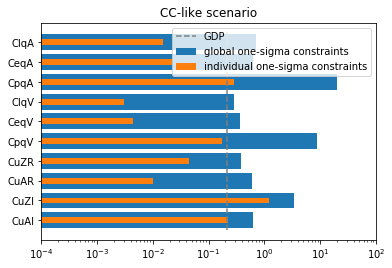

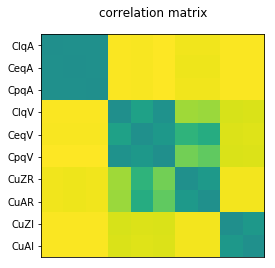

Individual and global one-sigma limits:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
0.015    0.022    0.29     0.003    0.0045   0.17     0.045    0.01     1.2      0.22     
0.71     0.62     20       0.29     0.37     8.9      0.38     0.59     3.4      0.62     

Global determinant parameter (GDP): 0.213052575332

Decomposition of the covariance matrix in eigenvectors and eigenvalues:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
0.013    -0.015   0.00088  -0.81    -0.53    -0.012   0.042    0.24     -6.1e-07 -1.9e-11 0.0025   
-0.73    0.48     -0.04    -0.27    0.39     -0.022   0.086    -0.012   -5.1e-06 2e-08    0.013    
0.44     -0.2     0.022    -0.46    0.72     -0.038   0.15     -0.036   -1.2e-05 -2.4e-08 0.014    
-0.52    -0.85    0.008    -0.032   0.056    -0.0028  0.0027   -0.011   -1.4e-06 1.3e-07  0.038    
-0.0046  -0.01    0.00017  0.21     -0.014   0.0057   0.83     0.52  

In [4]:
# use precomputed covariance matrices
## The following file contains a dictionary called 'var'
## with the stripped inverse covariance matrix elements and integration uncertainties.
execfile('var_cc.py')

# function to make nice matrices out of the dictionary
mat = lambda sqs,pp,pe: np.array([[varcc[sqs,pp,pe,i,j][0] if j>=i else varcc[sqs,pp,pe,j,i][0] for i in range(1,11)] for j in range(1,11)])

# construct the total inverse stripped covariance matrix by combining runs
tot = \
    +1500*eff[365]*mat(365.,0,0) \
    + 200*eff[350]*mat(350.,0,0)

showFitResults(tot,'CC-like')

### ILC-like scenario

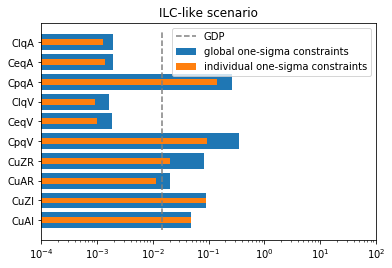

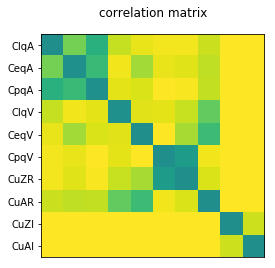

Individual and global one-sigma limits:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
0.0013   0.0014   0.14     0.00092  0.001    0.092    0.021    0.011    0.09     0.048    
0.0019   0.0019   0.26     0.0016   0.0018   0.35     0.083    0.02     0.091    0.048    

Global determinant parameter (GDP): 0.0147805884096

Decomposition of the covariance matrix in eigenvectors and eigenvalues:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
0.22     -0.19    0.0022   -0.81    -0.51    -0.0024  0.011    0.061    -2.6e-09 -1.4e-09 0.00087  
-0.13    -0.32    0.00088  0.53     -0.77    0.0079   -0.036   0.011    -7.4e-09 -1.9e-09 0.001    
-0.9     0.33     -0.0065  -0.23    -0.15    -0.00075 0.0037   0.023    7.9e-09  2e-09    0.0013   
0.35     0.87     -0.0023  0.11     -0.35    0.0031   -0.016   0.016    4.7e-08  -1.5e-09 0.0015   
-0.0035  0.0053   -0.014   -0.051   -0.044   0.027    -0.14    -0.99

In [5]:
# use precomputed covariance matrices
## The following file contains a dictionary called 'var'
## with the stripped inverse covariance matrix elements and integration uncertainties.
execfile('var_ilc.py')

# function to make nice matrices out of the dictionary
mat = lambda sqs,pp,pe: np.array([[var[sqs,pp,pe,i,j][0] if j>=i else var[sqs,pp,pe,j,i][0] for i in range(1,11)] for j in range(1,11)])

# construct the total inverse stripped covariance matrix by combining runs
tot = 500*eff[ 500]*.5*(mat( 500.,+.3,-.8)+mat( 500.,-.3,+.8)) \
    +1000*eff[1000]*.5*(mat(1000.,+.3,-.8)+mat(1000.,-.3,+.8))

showFitResults(tot,'ILC-like')

### CLIC-like scenario

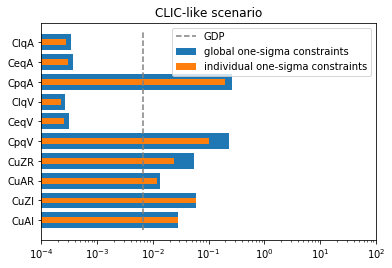

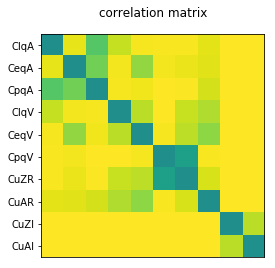

Individual and global one-sigma limits:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
0.00028  0.00031  0.19     0.00023  0.00026  0.1      0.024    0.012    0.058    0.028    
0.00034  0.00037  0.26     0.00027  0.00032  0.23     0.055    0.014    0.06     0.028    

Global determinant parameter (GDP): 0.00677762600181

Decomposition of the covariance matrix in eigenvectors and eigenvalues:

ClqA     CeqA     CpqA     ClqV     CeqV     CpqV     CuZR     CuAR     CuZI     CuAI     
-0.32    0.28     -0.00039 0.75     0.5      0.00024  -0.0012  -0.0074  1.9e-10  -2.4e-09 0.00021  
0.11     0.49     -0.00022 -0.57    0.65     -0.00088 0.0042   -0.00027 -1.3e-09 -4.1e-09 0.00026  
-0.88    0.25     -0.00074 -0.28    -0.29    -2.8e-05 0.00018  0.0041   2.3e-09  -3.3e-10 0.00028  
-0.33    -0.78    0.00024  -0.17    0.5      -0.00052 0.0028   -0.0026  5.3e-09  -4.7e-09 0.00037  
0.00044  -0.00075 0.0064   0.0066   0.0058   -0.026   0.13     0.99

In [6]:
# use precomputed covariance matrices
## The following file contains a dictionary called 'var'
## with the stripped inverse covariance matrix elements and integration uncertainties.
execfile('var_clic.py')

# function to make nice matrices out of the dictionary
mat = lambda sqs,pp,pe: np.array([[varclic[sqs,pp,pe,i,j][0] if j>=i else varclic[sqs,pp,pe,j,i][0] for i in range(1,11)] for j in range(1,11)])

# construct the total inverse stripped covariance matrix by combining runs
tot = 500*eff[ 380]*.5*(mat( 380.,0,-.8)+mat( 380.,0,+.8)) \
    +1500*eff[1400]*.5*(mat(1400.,0,-.8)+mat(1400.,0,+.8)) \
    +3000*eff[3000]*.5*(mat(3000.,0,-.8)+mat(3000.,0,+.8))
    
showFitResults(tot,'CLIC-like')